In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load the data 
amzn_df = pd.read_csv('AMZN.csv')

In [3]:
amzn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-17,19.712999,20.174500,19.683001,19.980499,19.980499,90102000
1,2014-01-21,20.150000,20.389999,20.080000,20.352501,20.352501,62442000
2,2014-01-22,20.400000,20.403000,20.100000,20.226999,20.226999,41210000
3,2014-01-23,20.049999,20.308500,19.889500,19.993500,19.993500,60508000
4,2014-01-24,19.908001,20.010000,19.363501,19.379999,19.379999,89168000


In [4]:
#Inspect it 
print(amzn_df)

            Date       Open       High        Low      Close  Adj Close  \
0     2014-01-17  19.712999  20.174500  19.683001  19.980499  19.980499   
1     2014-01-21  20.150000  20.389999  20.080000  20.352501  20.352501   
2     2014-01-22  20.400000  20.403000  20.100000  20.226999  20.226999   
3     2014-01-23  20.049999  20.308500  19.889500  19.993500  19.993500   
4     2014-01-24  19.908001  20.010000  19.363501  19.379999  19.379999   
...          ...        ...        ...        ...        ...        ...   
1253  2019-01-10  82.050499  83.162498  81.081001  82.810997  82.810997   
1254  2019-01-11  82.027496  83.014503  81.810997  82.028000  82.028000   
1255  2019-01-14  80.750000  82.410004  79.757500  80.860497  80.860497   
1256  2019-01-15  81.599998  83.758003  81.300499  83.727997  83.727997   
1257  2019-01-16  84.210999  85.250000  83.793999  84.189003  84.189003   

         Volume  
0      90102000  
1      62442000  
2      41210000  
3      60508000  
4      89

In [5]:
#print the summary 
print(amzn_df.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     41.719529    42.128989    41.231572    41.698033    41.698033   
std      24.087736    24.347035    23.744643    24.050869    24.050869   
min      14.220000    14.521000    14.200000    14.347500    14.347500   
25%      19.943500    20.309500    19.734626    20.032750    20.032750   
50%      37.071251    37.308750    36.665251    36.989000    36.989000   
75%      50.793748    51.254999    50.214252    50.893249    50.893249   
max     101.905502   102.525002   100.650002   101.975502   101.975502   

             Volume  
count  1.258000e+03  
mean   8.546041e+07  
std    4.821734e+07  
min    2.182400e+07  
25%    5.457000e+07  
50%    7.243200e+07  
75%    9.784700e+07  
max    4.771220e+08  


In [6]:
# load data set 2
amzn_df2 = pd.read_csv('AMZN_2020_2022.csv')

In [7]:
amzn_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-17,94.294502,94.332001,92.862503,93.236000,93.236000,79946000
1,2020-01-21,93.250000,94.713501,93.000000,94.599998,94.599998,74156000
2,2020-01-22,94.804497,95.125000,94.167000,94.373001,94.373001,64326000
3,2020-01-23,94.255501,94.499001,93.638000,94.228996,94.228996,49692000
4,2020-01-24,94.568497,94.749496,92.372002,93.082001,93.082001,75324000


In [8]:
#Inspect the 2020-2022
print(amzn_df2)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-17   94.294502   94.332001   92.862503   93.236000   93.236000   
1    2020-01-21   93.250000   94.713501   93.000000   94.599998   94.599998   
2    2020-01-22   94.804497   95.125000   94.167000   94.373001   94.373001   
3    2020-01-23   94.255501   94.499001   93.638000   94.228996   94.228996   
4    2020-01-24   94.568497   94.749496   92.372002   93.082001   93.082001   
..          ...         ...         ...         ...         ...         ...   
645  2022-08-10  142.899994  144.600006  141.009995  142.690002  142.690002   
646  2022-08-11  143.860001  144.490005  139.759995  140.639999  140.639999   
647  2022-08-12  142.050003  143.570007  140.119995  143.550003  143.550003   
648  2022-08-15  142.800003  143.759995  141.490005  143.179993  143.179993   
649  2022-08-16  143.910004  146.570007  142.000000  144.779999  144.779999   

       Volume  
0    79946000  
1    74156000  
2  

In [9]:
#print the summary 
print(amzn_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  650.000000  650.000000  650.000000  650.000000  650.000000   
mean   148.333415  150.234915  146.300269  148.263115  148.263115   
std     24.977077   24.857995   24.878893   24.805564   24.805564   
min     82.075500   87.972504   81.301498   83.830498   83.830498   
25%    130.089126  131.135879  126.390375  128.986252  128.986252   
50%    157.837006  159.479996  155.691498  157.618248  157.618248   
75%    165.937496  167.603248  164.344620  165.634747  165.634747   
max    187.199997  188.654007  184.839493  186.570496  186.570496   

             Volume  
count  6.500000e+02  
mean   8.249905e+07  
std    3.595608e+07  
min    2.903800e+07  
25%    5.858200e+07  
50%    7.250700e+07  
75%    9.794900e+07  
max    3.113460e+08  


In [10]:
#now prep the data for 2014-2019
amzn_df.set_index(pd.DatetimeIndex(amzn_df['Date']), inplace=True)

In [11]:
#now prep the data for 2020-2022
amzn_df2.set_index(pd.DatetimeIndex(amzn_df2['Date']), inplace=True)

In [12]:
#Keep the close for 2014-19
amzn_df = amzn_df[['Close']]

In [13]:
print(amzn_df)

                Close
Date                 
2014-01-17  19.980499
2014-01-21  20.352501
2014-01-22  20.226999
2014-01-23  19.993500
2014-01-24  19.379999
...               ...
2019-01-10  82.810997
2019-01-11  82.028000
2019-01-14  80.860497
2019-01-15  83.727997
2019-01-16  84.189003

[1258 rows x 1 columns]


In [14]:
#Keep the close 2020-22
amzn_df2 = amzn_df2[['Close']]

In [15]:
print(amzn_df2)

                 Close
Date                  
2020-01-17   93.236000
2020-01-21   94.599998
2020-01-22   94.373001
2020-01-23   94.228996
2020-01-24   93.082001
...                ...
2022-08-10  142.690002
2022-08-11  140.639999
2022-08-12  143.550003
2022-08-15  143.179993
2022-08-16  144.779999

[650 rows x 1 columns]


In [16]:
# final_data = amzn_df2.plot('Date','Close', color='red')
# new_data = final_data.head(60)
# new_data.plot('Date','Close', color='green')
# plt.show()

# amzn_df2.plot('Close', 'Date', color='red')
# plt.show()

In [49]:
#okay what data set am i going to be using. that is what im am confused about. 
#lets try the 2014 data for shits and giggles 

data_14_19 = amzn_df.filter(['Close'])
dataset_14_19 = data_14_19.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_14_19)

training_data_len =math.ceil(len(dataset_14_19) *.7)
train_data =scaled_data[0:training_data_len , : ]

X_train_data = []
y_train_data = []

for i in range(60,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

#60 = number of days 
# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [50]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

In [51]:
# Comple the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

821/821 [==============================] - 18s 19ms/step - loss: 5.0253e-04


In [52]:
test_data = scaled_data[training_data_len -60: , : ]

X_test = []

y_test = dataset_14_19[training_data_len : , : ]

for i in range(60,len(test_data)):
    
    X_test.append(test_data[i-60:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


12/12 [==============================] - 1s 13ms/step


In [53]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [54]:
print(rmse)

2.9214789829546284


In [55]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


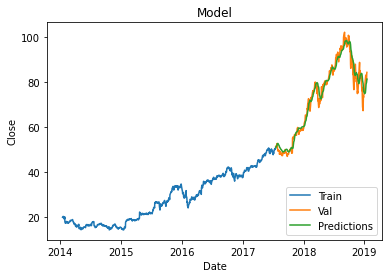

In [56]:
#Predict and visualize 

train = amzn_df[:training_data_len]

valid = amzn_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('Close')

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


In [ ]:
#Predict 2020-2022 based off of amazon_df

In [ ]:
#Plot predicted amazon_df 2020-2022 against actual amazon_df2 

In [ ]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
amzn_df['Actual Prediction'] = amzn_df[['Close']].shift(-prediction_days)


In [ ]:
#print the new column for 2014-19
amzn_df

In [ ]:
# Create independent dataset X and create a numpy array
X=X = np.array(amzn_df[['Close']])

In [ ]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [ ]:
#Creat the dependetnt data for Y
Y=amzn_df['Actual Prediction'].values


In [ ]:
Y=Y[:-prediction_days]
# print(Y)

In [ ]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

In [ ]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

In [ ]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(amzn_df[['Close']])[-prediction_days:]
# acutal_days

In [ ]:
#print the liner regression prediction  for the next 52 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [ ]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(amzn_df2[['Close']])
actual_20_22

In [ ]:
linear_prediction.shape

In [ ]:
actual_20_22.shape 

In [ ]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('Amzn Close USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()